# 通し課題 Day3　　Kickstarter Projects

【目的】あるクラウドファンディングが成功するかどうか事前に予測するためのモデルを作成する

【データ】CSVファイルの読み込み


## [進捗状況] 
- Day1で作成したロジスティック回帰モデルの精度を向上させるため、決定木やニューラルネットワークのモデルを使用
- Day1で採用した説明変数は、goal, category_Apparel であったが、それぞれ採用する説明変数を変更する。
- goalに関しては、単位統一された usd_goal_real を採用する。
- category_Apparel は、適当にピックアップした説明変数なので、メインカテゴリのうち下記条件にてカテゴリの説明変数を採用。

　**メインカテゴリのうち、state = successful の正答率が高い Dance を説明変数として採用。**

　※本当はすべてのcategoryについて検討したかったが、今回は特定のcategoryがどのくらいsuccessfulになるのか予測するモデルとして検討した。
- クラウドファンディングの期間は成功するかどうかに影響すると考えたので説明変数として採用 (deadline(締切日)とlaunched(開始日時)を日数計算し、period(期間)を定義)
- 説明変数、目的変数は下記のとおりである。

　**(説明変数) usd_goal_real, main_category_Dance, period**

　**(目的変数) state**

- 決定木やニューラルネットワークを使用したときのAccuracy(学習データ、テストデータ)の値を算出した。
- Day2で検証したロジスティック回帰よりは、予測モデルとしての精度が高くなった。


## [今後の課題]
- 実装できなかったモデルを今後実装できるようにしたい。
- ハイパーパラメータのチューニングを取り入れるようにしていきたい。

## ライブラリのインポート

In [1]:
# ライブラリのインポート
%matplotlib inline
import pandas as pd  # Pandas
import numpy as np   # Numpy
import seaborn as sns # Seaborn
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier # 確率的勾配法
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数
from sklearn.model_selection import train_test_split # ホールドアウト法に関する関数

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.feature_selection import RFECV

import tensorflow as tf
from tensorflow.compat.v1.keras import Sequential
from tensorflow.compat.v1.keras.layers import Dense, Dropout, Activation
from tensorflow.compat.v1.keras.optimizers import SGD,RMSprop, Adagrad, Adadelta, Adam

## CSVファイル入出力関連

In [2]:
# CSVファイルの読み込み
# データフレームの作成
kick_st = pd.read_csv('ks-projects-201801.csv')

# CSVファイル読み込みの確認
kick_st

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [3]:
# state の successful or failed の行だけ抽出する
kick_tmp = kick_st.copy()
kick_tmp = kick_tmp[kick_tmp['state'].isin(['failed','successful'])]

#kick_tmp の内容確認
kick_tmp

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
10,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09,2500.0,2013-09-09 18:19:37,0.00,failed,0,CA,0.00,0.00,2406.39
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,successful,100,US,12700.00,12700.00,12500.00
12,1000055792,The Cottage Market,Crafts,Crafts,USD,2014-10-02,5000.0,2014-09-02 17:11:50,0.00,failed,0,US,0.00,0.00,5000.00


In [4]:
# 条件を絞ったデータフレームをCSVファイルへ書き出し(Tmporaryデータ)
kick_tmp.to_csv("ks-projects-201801-select.csv")

In [5]:
# state が successful の時 True, failed の時 False とする
kick_tmp2 = kick_tmp.replace(["successful","failed"],[True, False])
kick_tmp2

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,False,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,False,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,False,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,False,1,US,1.00,1.00,5000.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,True,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,True,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,False,40,US,453.00,453.00,25000.00
10,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09,2500.0,2013-09-09 18:19:37,0.00,False,0,CA,0.00,0.00,2406.39
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,True,100,US,12700.00,12700.00,12500.00
12,1000055792,The Cottage Market,Crafts,Crafts,USD,2014-10-02,5000.0,2014-09-02 17:11:50,0.00,False,0,US,0.00,0.00,5000.00


## 欠損値
### 欠損値の対応

In [6]:
# 欠損値の確認
kick_tmp2.isnull().sum()

ID                    0
name                  3
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         210
usd_pledged_real      0
usd_goal_real         0
dtype: int64

欠損値はdropすることとする

In [7]:
# 欠損値のdrop
kick_tmp2 = kick_tmp2.dropna()

## 説明変数の検証

### category について
categoryの件数とstateの平均をグラフ化する

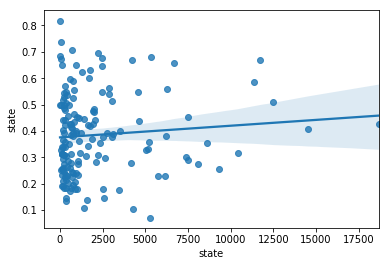

In [8]:
# カテゴリの件数とstateの平均のグラフ
cntctg = kick_tmp2.groupby(['category']).state.count()  # 件数
meanctg = kick_tmp2.groupby(['category']).state.mean()  # 平均
sns.regplot(cntctg, meanctg)

【考察】件数が多いので成功しやすいわけではなく、カテゴリによると考えられる。

### main_category について
categoryだと詳細すぎるため、main_categoryに注目。

main_category の基本統計量を算出し、今回はsuccessfulの確率が高いカテゴリを説明変数として採用する。

件数とstateの平均をグラフ化する。

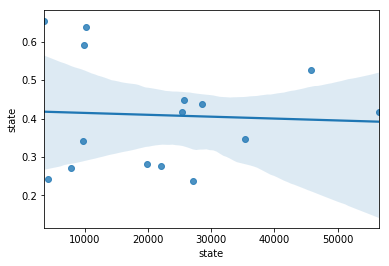

In [9]:
# メインカテゴリの state の基本統計量を算出
cntctg2 = kick_tmp2.groupby(['main_category']).state.count()  # 件数
meanctg2 = kick_tmp2.groupby(['main_category']).state.mean()  # 平均
sns.regplot(cntctg2, meanctg2)

In [10]:
meanctg2

main_category
Art             0.448908
Comics          0.591415
Crafts          0.270530
Dance           0.654352
Design          0.415921
Fashion         0.282846
Film & Video    0.417889
Food            0.275914
Games           0.438920
Journalism      0.243973
Music           0.526299
Photography     0.341108
Publishing      0.347330
Technology      0.237854
Theater         0.637961
Name: state, dtype: float64

【考察】Successfulになる確率が最も高い Dance に注目する。

### usd_goal_real について
目標金額によって成功しやすいかどうかを検討する。

usd_goal_realがUSドルに単位統一されたものなので、この列を採用する。

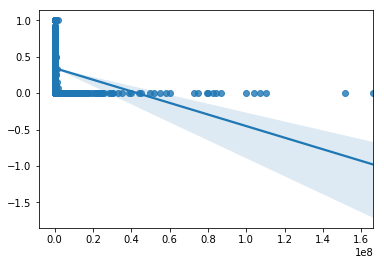

In [11]:
# usd_goal_realの平均とstateのグラフ
meanugr = kick_tmp2.groupby(['usd_goal_real']).state.mean()  # 平均
sns.regplot(meanugr.index.array, meanugr.values)

【考察】一定の金額を超すと失敗しやすい傾向にあると考えられる。

### deadlineについて
期間が長くなると、成功しやすさに影響するのか検討する。

deadline(締切日)とlaunched(開始日時)を日数計算し、period(期間)を定義し平均を求める。

C:\Users\keiryo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\keiryo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\keiryo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

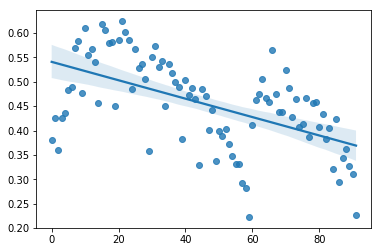

In [12]:
# deadline(締切日)とlaunched(開始日時)を timedate 型に変換
kick_tmp2['deadline'] = pd.to_datetime(kick_tmp2['deadline'], format='%Y-%m-%d %H:%M:%S')
kick_tmp2['launched'] = pd.to_datetime(kick_tmp2['launched'], format='%Y-%m-%d %H:%M:%S')

# クラウドファンディングの期間（日数）を計算
kick_tmp2['period']=(kick_tmp2['deadline'] - kick_tmp2['launched']).dt.days

# periodの平均とstateのグラフ
meanprd = kick_tmp2.groupby(['period']).state.mean()  # 平均
sns.regplot(meanprd.index.array, meanprd.values)

【考察】期間が長くなると成功率は下がる傾向にあるようであるが、一概にそうとはいえなさそうである。

他の要因について検討する必要があるが、今回はperiodを説明変数に採用する。

### 欠損値の対応

### main_category をダミー変数に置換する

In [13]:
# ダミー変数に置換する
kick_tmp2 = pd.get_dummies(kick_tmp2, columns=['main_category'])

kick_tmp2

,ID,name,category,currency,deadline,goal,launched,pledged,state,backers,...,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater
0,1000002330,The Songs of Adelaide & Abullah,Poetry,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,False,0,...,0,0,0,0,0,0,0,1,0,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,False,15,...,0,1,0,0,0,0,0,0,0,0
2,1000004038,Where is Hank?,Narrative Film,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,False,3,...,0,1,0,0,0,0,0,0,0,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,False,1,...,0,0,0,0,0,1,0,0,0,0
5,1000014025,Monarch Espresso Bar,Restaurants,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,True,224,...,0,0,1,0,0,0,0,0,0,0
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,True,16,...,0,0,1,0,0,0,0,0,0,0
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,False,40,...,0,0,1,0,0,0,0,0,0,0
10,100004721,Of Jesus and Madmen,Nonfiction,CAD,2013-10-09,2500.0,2013-09-09 18:19:37,0.00,False,0,...,0,0,0,0,0,0,0,1,0,0
11,100005484,Lisa Lim New CD!,Indie Rock,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,True,100,...,0,0,0,0,0,1,0,0,0,0
12,1000055792,The Cottage Market,Crafts,USD,2014-10-02,5000.0,2014-09-02 17:11:50,0.00,False,0,...,0,0,0,0,0,0,0,0,0,0


## 学習
- 説明変数X：usd_goal_real, main_category_Dance, period
- 目的変数y：state 

## ロジスティック回帰を使用する (Day1の内容)

In [14]:
# ロジスティック回帰
# X：説明変数 (usd_goal_real, main_category_Dance, period)  y：目的変数 (state)
y = kick_tmp2['state'].values
X = kick_tmp2[['usd_goal_real', 'main_category_Dance', 'period']].values
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
clf.fit(X, y)

# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
w3 = clf.coef_[0, 2]
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}'.format(w0, w1, w2, w3))

w0 = 4033.149, w1 = -93.084, w2 = 269.719, w3 = 50133.671


In [15]:
# ラベルを予測
y_est = clf.predict(X)

# 対数尤度を表示
print('対数尤度 = {:.3f}'.format(- log_loss(y, y_est)))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

対数尤度 = -16.647
正答率 = 51.804%


### クロス集計

**混同行列**

In [16]:
# 予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(y, y_est), 
                        index=['正解 = failed', '正解 = successful'], 
                        columns=['予測 = failed', '予測 = successful'])
conf_mat

,予測 = failed,予測 = successful
正解 = failed,56075,141536
正解 = successful,18214,115637


**Precision, Recall, F1**

In [17]:
# Precision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_est)

# 「クラウドファンデイングが成功する」に関するPrecision, Recall, F1を表示
print('Precision = {:.3f}%'.format(100 * precision[1]))
print('Recall = {:.3f}%'.format(100 * recall[1]))
print('F1 = {:.3f}%'.format(100 * f1_score[1]))

Precision = 44.965%
Recall = 86.392%
F1 = 59.146%


# 汎化誤差の検証 （Day1の検証 → Day2）
## ホールドアウト法
データ数は多いと判断されるため、汎化誤差の検証はホールドアウト法を採用する。

### 学習用データ(80%)　テストデータ(20%) の場合

In [18]:
# ホールドアウト法を用いて検証する
test_size = 0.2        # 全データのうち、何%をテストデータにするか（20%に設定）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234) # テストデータはランダム選択

- X_train：学習データ用の説明変数
- X_test ：テストデータ用の説明変数
- y_train：学習データ用の目的変数
- y_test ：テストデータ用の目的変数

**学習データに対する予測**

In [19]:
# 学習用データを使ってロジスティック回帰モデルを学習
regr = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
regr.fit(X_train, y_train)

# 学習用データに対する予測を実行
y_pred_train = regr.predict(X_train)

# 対数尤度を表示
print('対数尤度 [Train] = {:.3f}'.format(- log_loss(y_train, y_pred_train)))

# 正答率を表示
print('正答率 [Train] = {:.3f}%'.format(100 * accuracy_score(y_train, y_pred_train)))

対数尤度 [Train] = -16.233
正答率 [Train] = 53.002%


**テストデータに対する予測**

In [20]:
# テスト用データを使ってロジスティック回帰モデルを学習  <<←これはやってはいけないミス！備忘録のため、コメントアウトして残す>>
#regr = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
#regr.fit(X_test, y_test)

# テスト用データに対する予測を実行
y_pred_test = regr.predict(X_test)

# 対数尤度を表示
print('対数尤度 [Test] = {:.3f}'.format(- log_loss(y_test, y_pred_test)))

# 正答率を表示
print('正答率 [Test] = {:.3f}%'.format(100 * accuracy_score(y_test, y_pred_test)))

対数尤度 [Test] = -16.339
正答率 [Test] = 52.695%


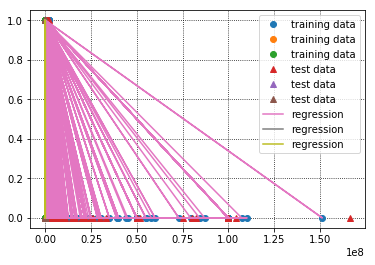

In [21]:
# グラフに重ねて表示する
plt.plot(X_train, y_train, 'o', label='training data')
plt.plot(X_test, y_test, '^', label='test data')
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(X_train, y_pred_train, label='regression')
plt.legend(loc='best')
plt.show()

【考察】訓練誤差と汎化誤差における差はあまりないが、対数尤度をもっと最大化できるように最適化したい。

## 標準化

説明変数のスケールを標準化する(学習データ)

In [22]:
# 説明変数(学習データ)の標準化
stdsc = StandardScaler()
X_train_stand = stdsc.fit_transform(X_train)

#テスト用データの標準化
X_test = stdsc.transform(X_test)

# 学習用データを使ってロジスティック回帰モデルを学習（L1正則化）
clf = SGDClassifier(loss='log', penalty='l1', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
# L1正則化＋標準化したデータで学習する
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=1234, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

### 学習用データに対する予測 (λ＝0.001)
### L1正則化

In [23]:
# 学習用データを使ってロジスティック回帰モデルを学習
regr = SGDClassifier(loss='log', penalty='l1', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3, alpha=0.001)
regr.fit(X_train, y_train)

# 学習用データに対する予測を実行
y_pred_train = regr.predict(X_train)

# 対数尤度を表示
print('対数尤度 [Train] = {:.3f}'.format(- log_loss(y_train, y_pred_train)))

# 正答率を表示
print('正答率 [Train] = {:.3f}%'.format(100 * accuracy_score(y_train, y_pred_train)))

対数尤度 [Train] = -14.939
正答率 [Train] = 56.747%


### テスト用データに対する予測 (λ＝0.001)

In [24]:
# テスト用データに対する予測を実行
y_pred_test = regr.predict(X_test)

# 対数尤度を表示
print('対数尤度 [Test] = {:.3f}'.format(- log_loss(y_test, y_pred_test)))

# 正答率を表示
print('正答率 [Test] = {:.3f}%'.format(100 * accuracy_score(y_test, y_pred_test)))

対数尤度 [Test] = -16.770
正答率 [Test] = 51.446%


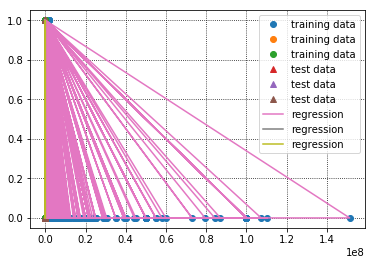

In [25]:
# グラフに重ねて表示する
plt.plot(X_train, y_train, 'o', label='training data')
plt.plot(X_test, y_test, '^', label='test data')
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(X_train, y_pred_train, label='regression')
plt.legend(loc='best')
plt.show()

### クロス集計(標準化, 正則化後)

**混同行列**

In [26]:
# 予測値と正解のクロス集計
conf_mat2 = pd.DataFrame(confusion_matrix(y_test, y_pred_test), 
                        index=['正解 = failed', '正解 = successful'], 
                        columns=['予測 = failed', '予測 = successful'])
conf_mat2

,予測 = failed,予測 = successful
正解 = failed,27260,12571
正解 = successful,19617,6845


**Precision, Recall, F1**

In [27]:
# Precision, Recall, F1-scoreを計算
precision2, recall2, f1_score2, _ = precision_recall_fscore_support(y_test, y_pred_test)

# 「クラウドファンデイングが成功する」に関するPrecision, Recall, F1を表示
print('Precision = {:.3f}%'.format(100 * precision2[1]))
print('Recall = {:.3f}%'.format(100 * recall2[1]))
print('F1 = {:.3f}%'.format(100 * f1_score2[1]))

Precision = 35.254%
Recall = 25.867%
F1 = 29.840%


**精度向上のために、他の手法を検討する。**

# 特徴選択 (Day3)

### 説明変数の相関関係を確認

In [28]:
# 説明変数の相関係数を確認
kick_tmp2[['usd_goal_real', 'main_category_Dance', 'period']].corr()

,usd_goal_real,main_category_Dance,period
usd_goal_real,1.000000,-0.003123,0.021611
main_category_Dance,-0.003123,1.000000,-0.009381
period,0.021611,-0.009381,1.000000


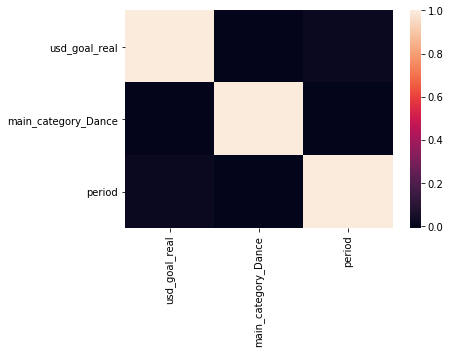

In [29]:
# ヒートマップにして可視化
sns.heatmap(kick_tmp2[['usd_goal_real', 'main_category_Dance', 'period']].corr())

ヒートマップの結果より、各説明変数の相関関係はほぼないことがわかる。

### ステップワイズ法による特徴選択

In [30]:
# ロジスティック回帰
estimator = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)

# ステップワイズ法による特徴選択
rfecv = RFECV(estimator, cv=3, scoring='accuracy')

# fitで特徴選択を実行
rfecv.fit(X_train, y_train)

RFECV(cv=3,
   estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='none',
       power_t=0.5, random_state=1234, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

In [31]:
# 特徴のランキングを表示（1が最も重要な特徴）
print('Feature ranking: \n{}'.format(rfecv.ranking_))

Feature ranking: 
[1 1 1]


In [32]:
# rfecv.support_でランキング1位以外はFalseとするindexを取得する
rfecv.support_

array([ True,  True,  True])

ステップワイズ法で特徴選択したが、どれもランキングが1のため、今回ピックアップした説明変数からは削除なし。

## ランダムフォレストの使用

### 学習

In [33]:
# 全データのうち、何%をテストデータにするか（20%に設定）
test_size = 0.2    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234) # テストデータはランダム選択

# ランダムフォレスト
clf = RandomForestClassifier(n_estimators=5, max_depth=3, criterion="entropy",
                                                min_samples_leaf=3, min_samples_split=3, random_state=1234)
clf = clf.fit(X_train, y_train)

### 決定木の描画

0


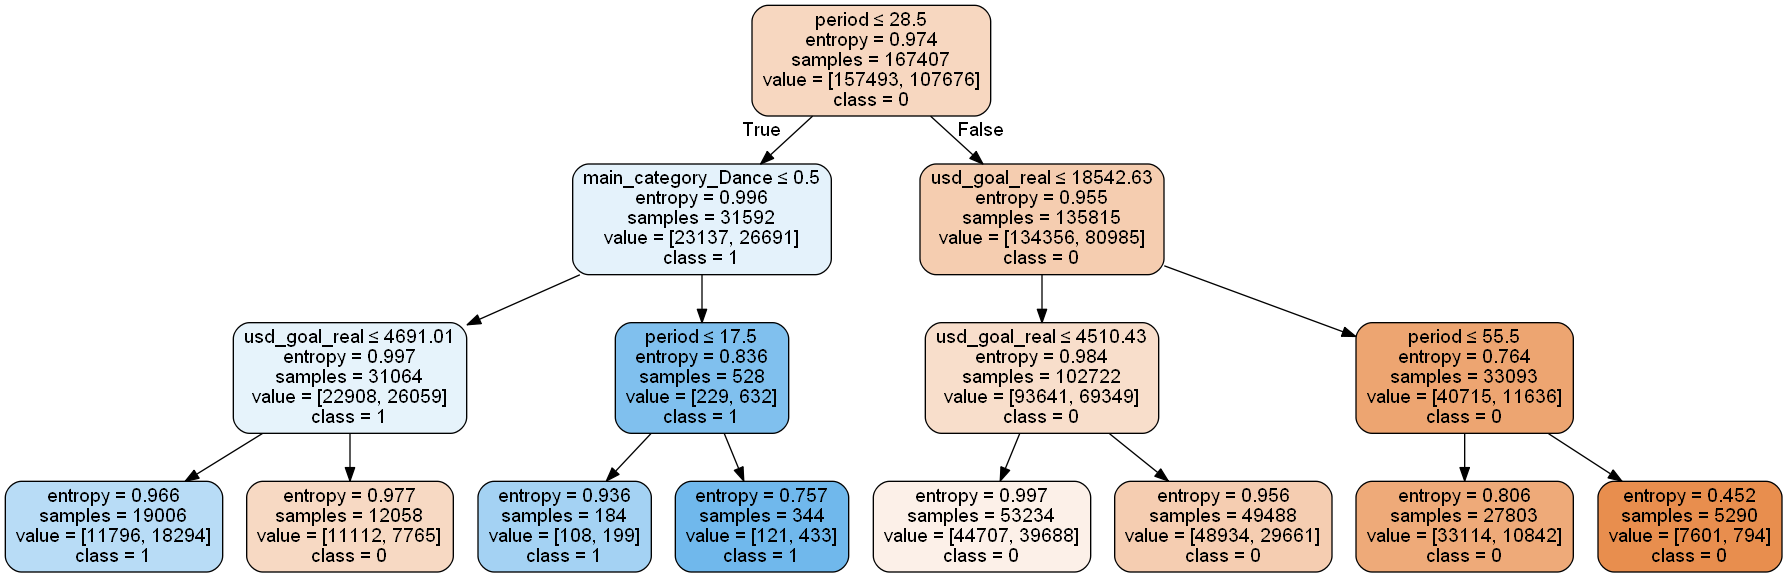

1


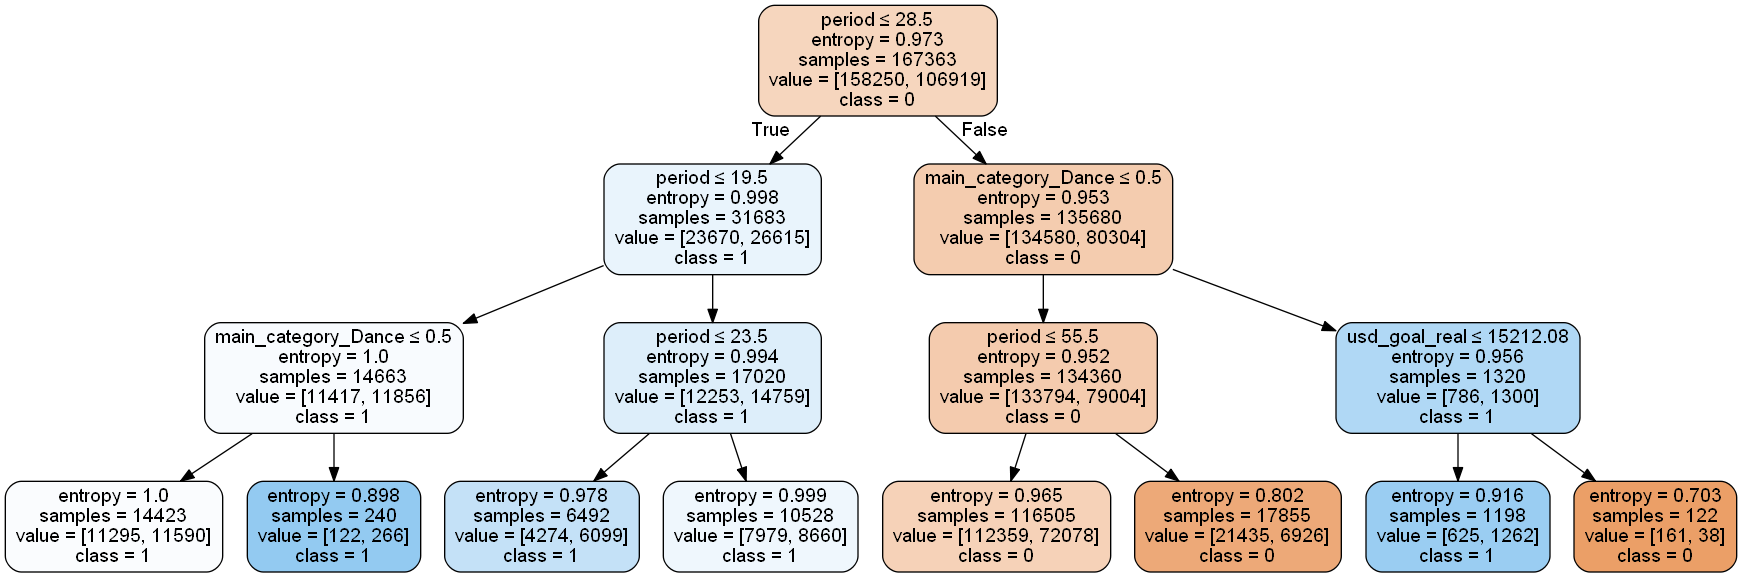

2


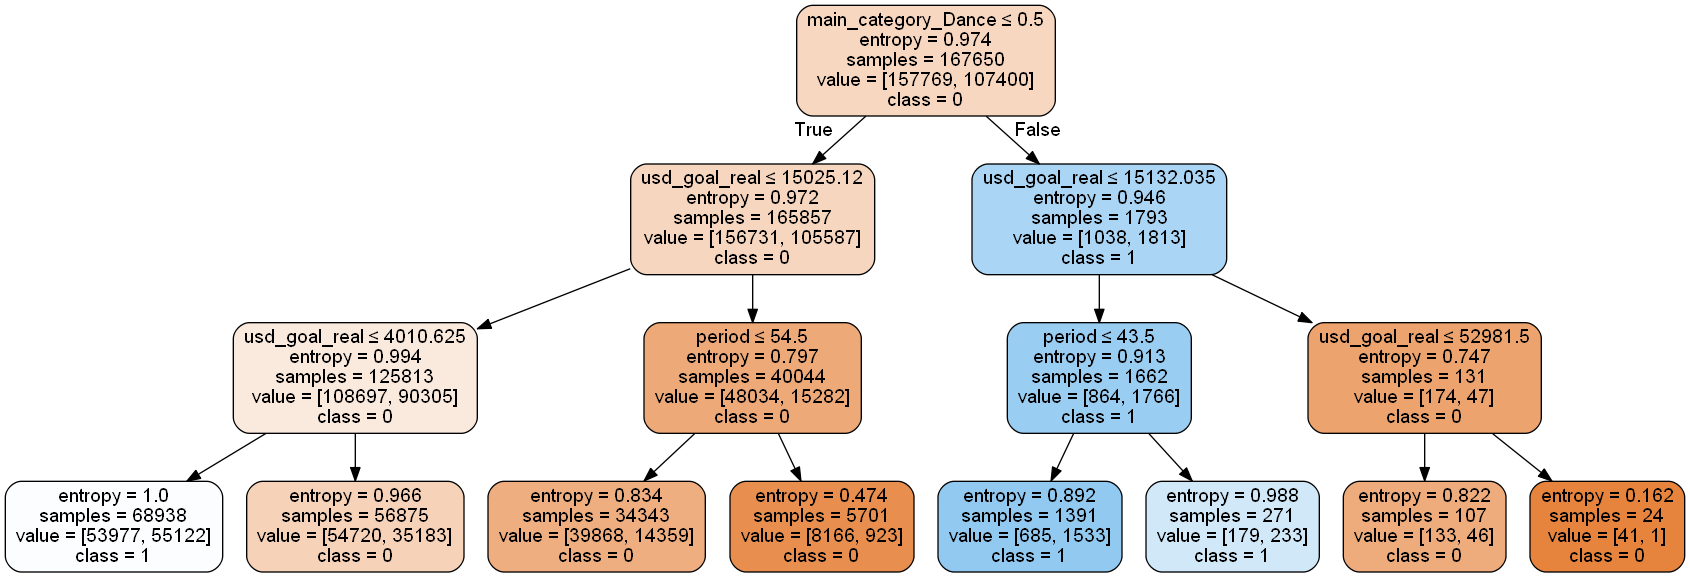

3


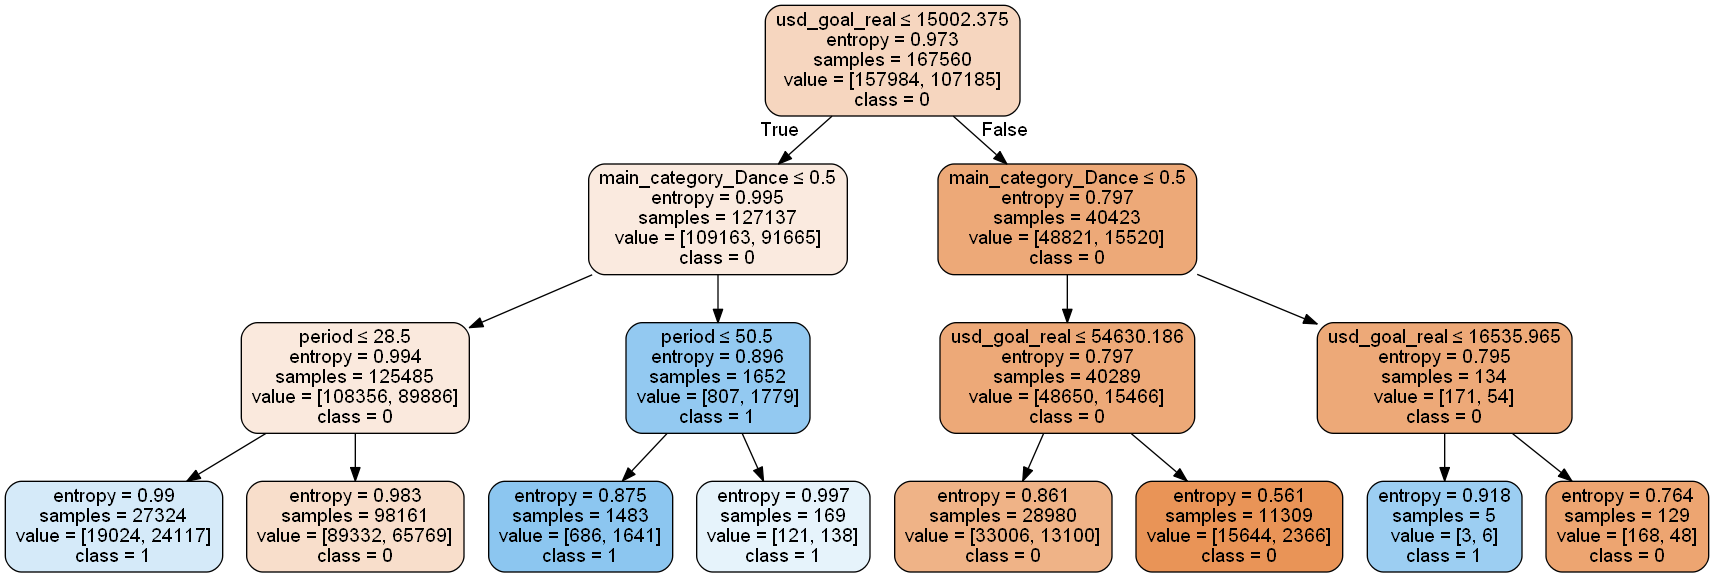

4


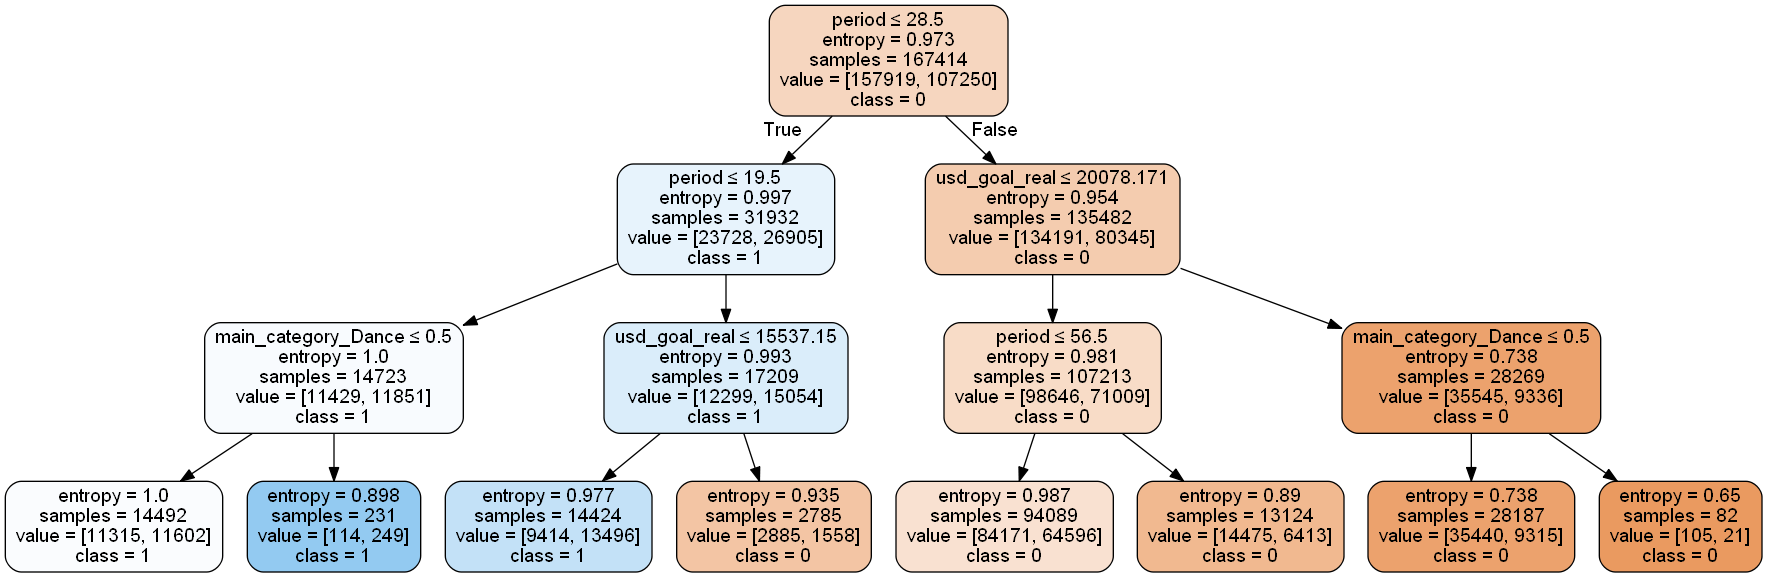

In [34]:
for i, est in enumerate(clf.estimators_):
    print(i)
    
    # 決定木の描画
    dot_data = StringIO() #dotファイル情報の格納先
    export_graphviz(est, out_file=dot_data,  
                         feature_names=["usd_goal_real", "main_category_Dance", "period"],  
                         class_names=["0","1", "2"],  
                         filled=True, rounded=True,  
                         special_characters=True) 
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
    display(Image(graph.create_png()))

In [35]:
# 学習用データに対する予測を実行
y_pred_train = clf.predict(X_train)

# 対数尤度を表示
print('対数尤度 [Train] = {:.3f}'.format(- log_loss(y_train, y_pred_train)))

# 正答率を表示
print('正答率 [Train] = {:.3f}%'.format(100 * accuracy_score(y_train, y_pred_train)))

対数尤度 [Train] = -13.018
正答率 [Train] = 62.310%


In [36]:
# テスト用データに対する予測を実行
y_pred_test = clf.predict(X_test)

# 対数尤度を表示
print('対数尤度 [Test] = {:.3f}'.format(- log_loss(y_test, y_pred_test)))

# 正答率を表示
print('正答率 [Test] = {:.3f}%'.format(100 * accuracy_score(y_test, y_pred_test)))

対数尤度 [Test] = -12.909
正答率 [Test] = 62.624%


## アダブーストの使用

### 学習

In [37]:
# 全データのうち、何%をテストデータにするか（20%に設定）
test_size = 0.2    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234) # テストデータはランダム選択

# アダブースト
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4,
                                                min_samples_leaf=3,
                                                min_samples_split=3, 
                                                random_state=1234,
                                                criterion="entropy"),
                                               n_estimators=5, random_state=1234)
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best'),
          learning_rate=1.0, n_estimators=5, random_state=1234)

### 決定木の描画

0


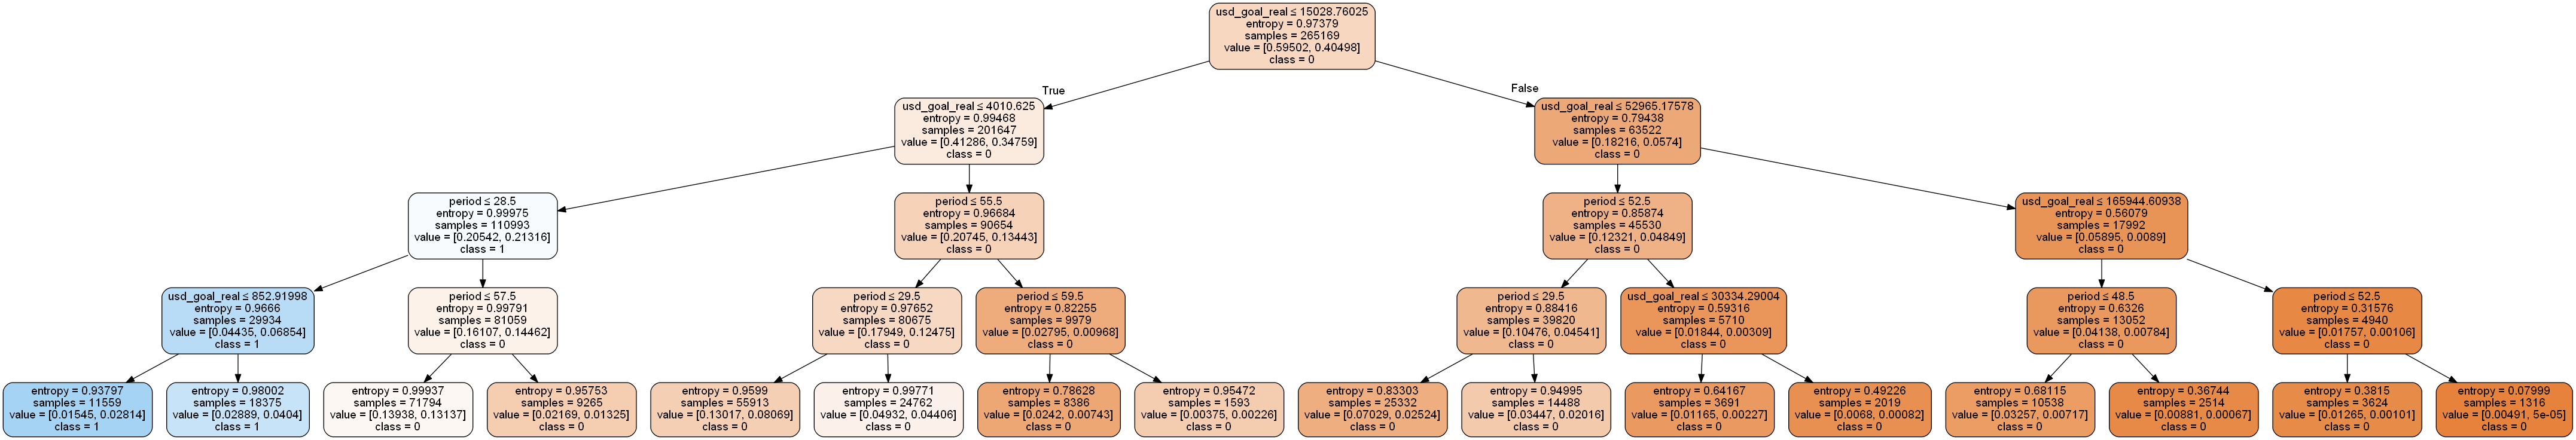

1


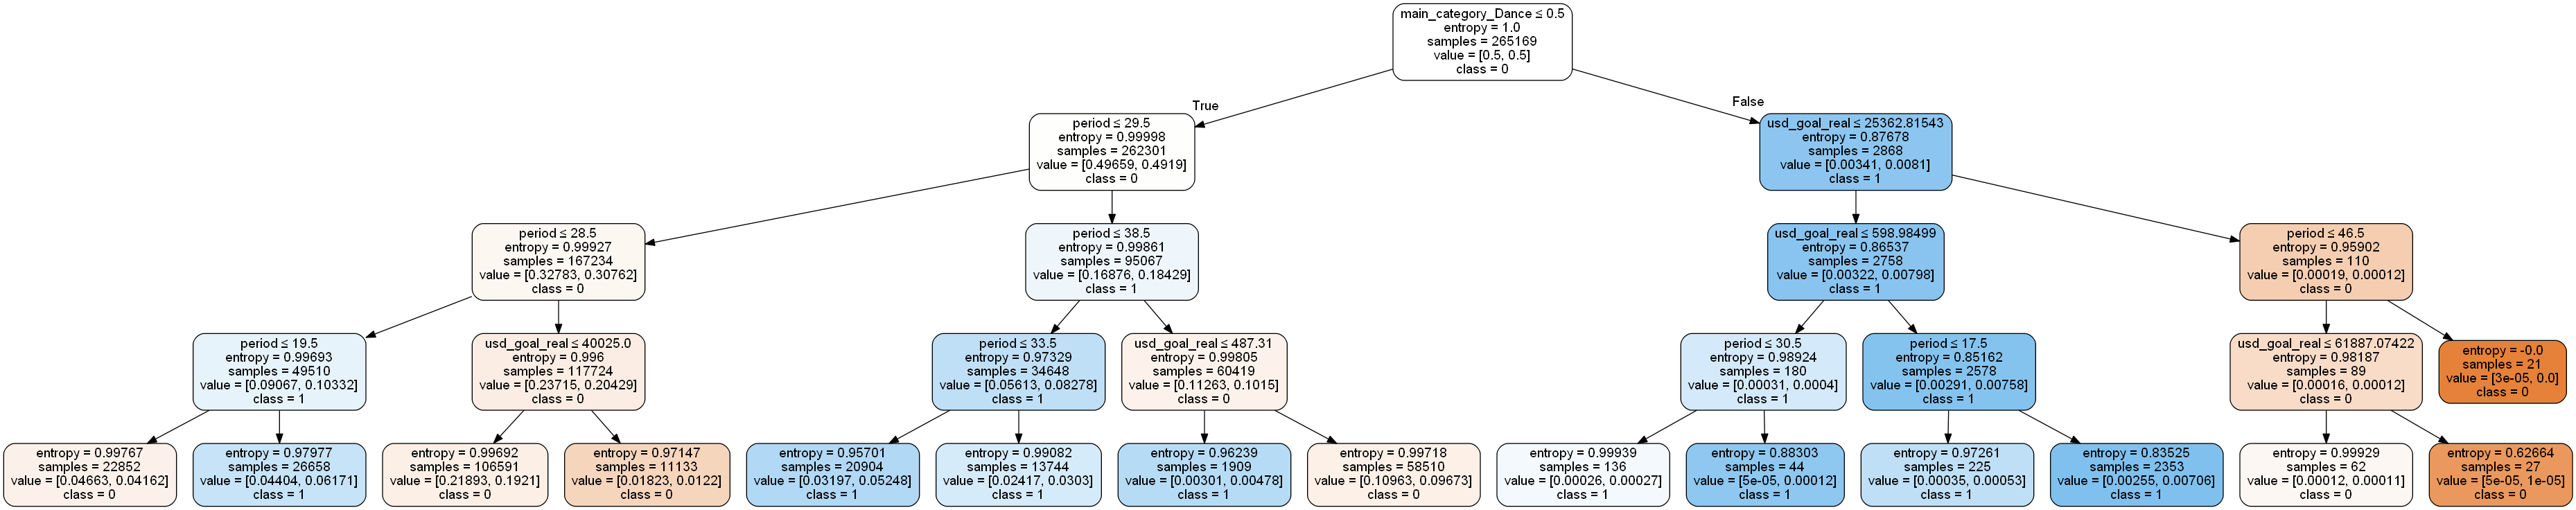

2


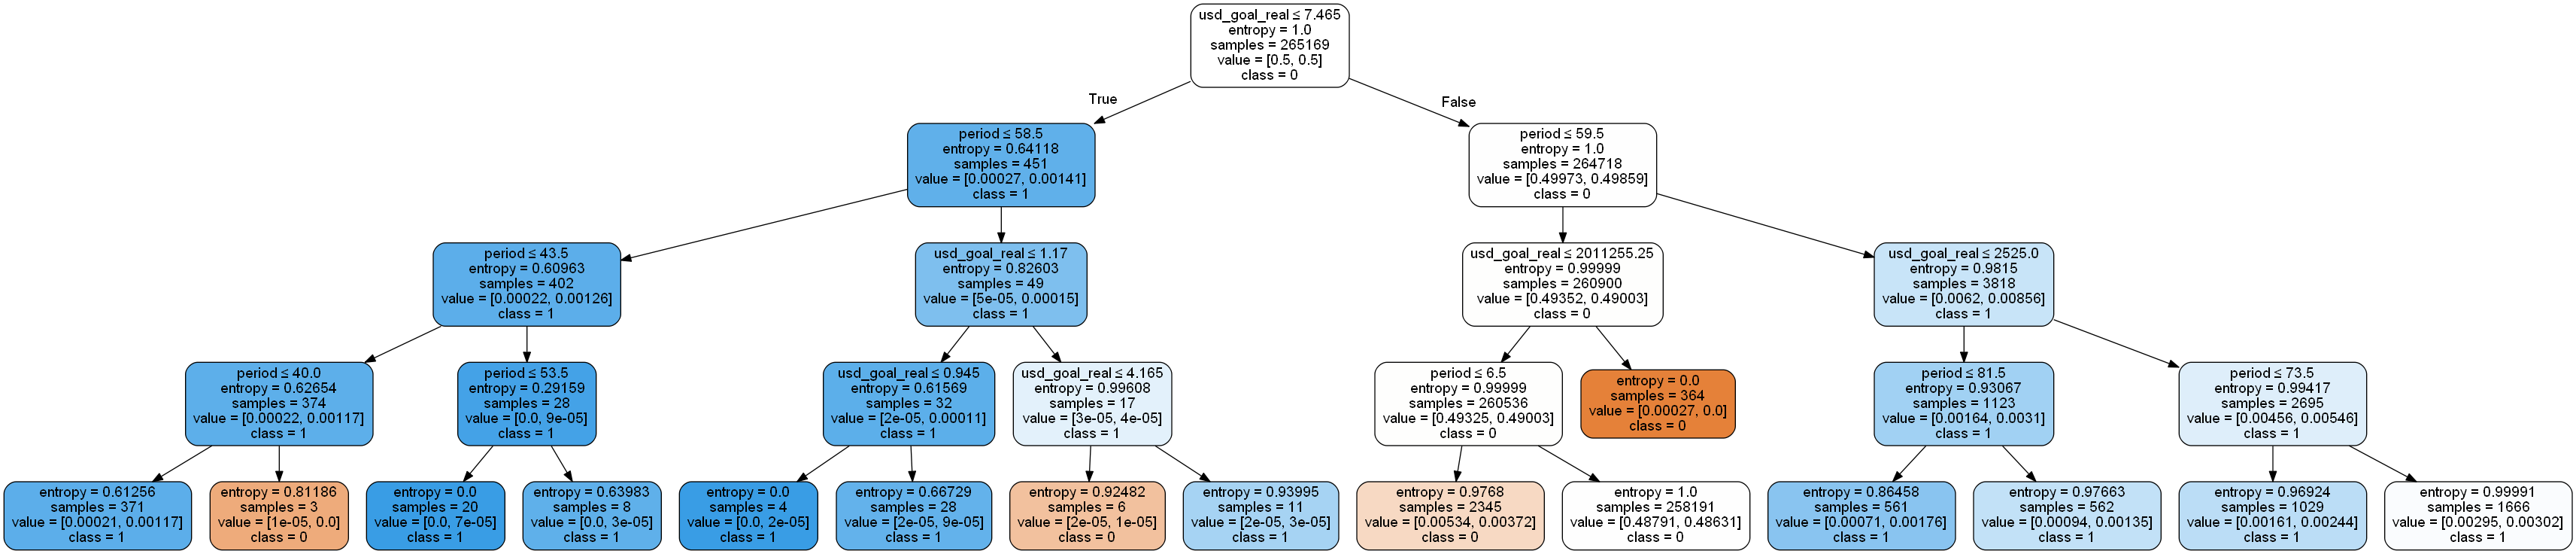

3


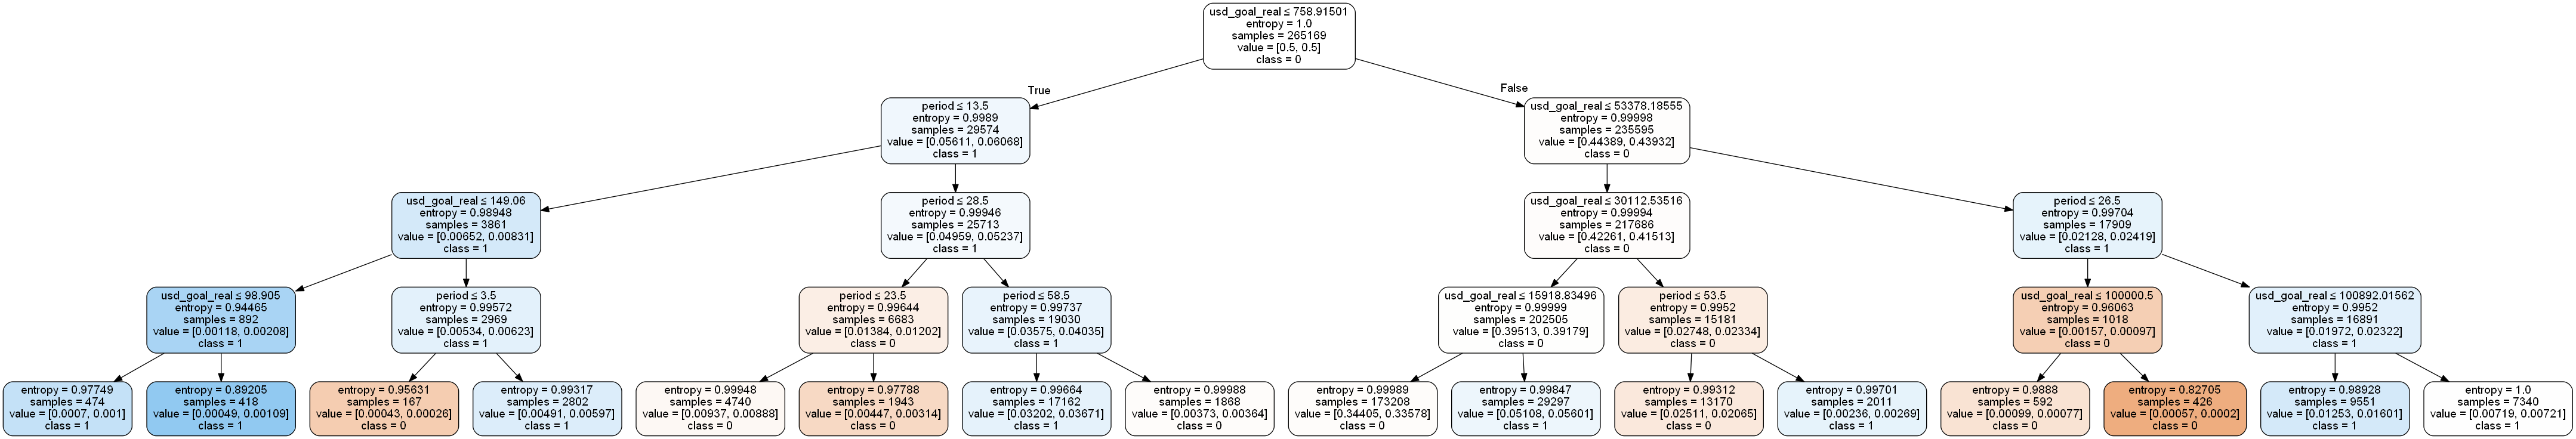

4


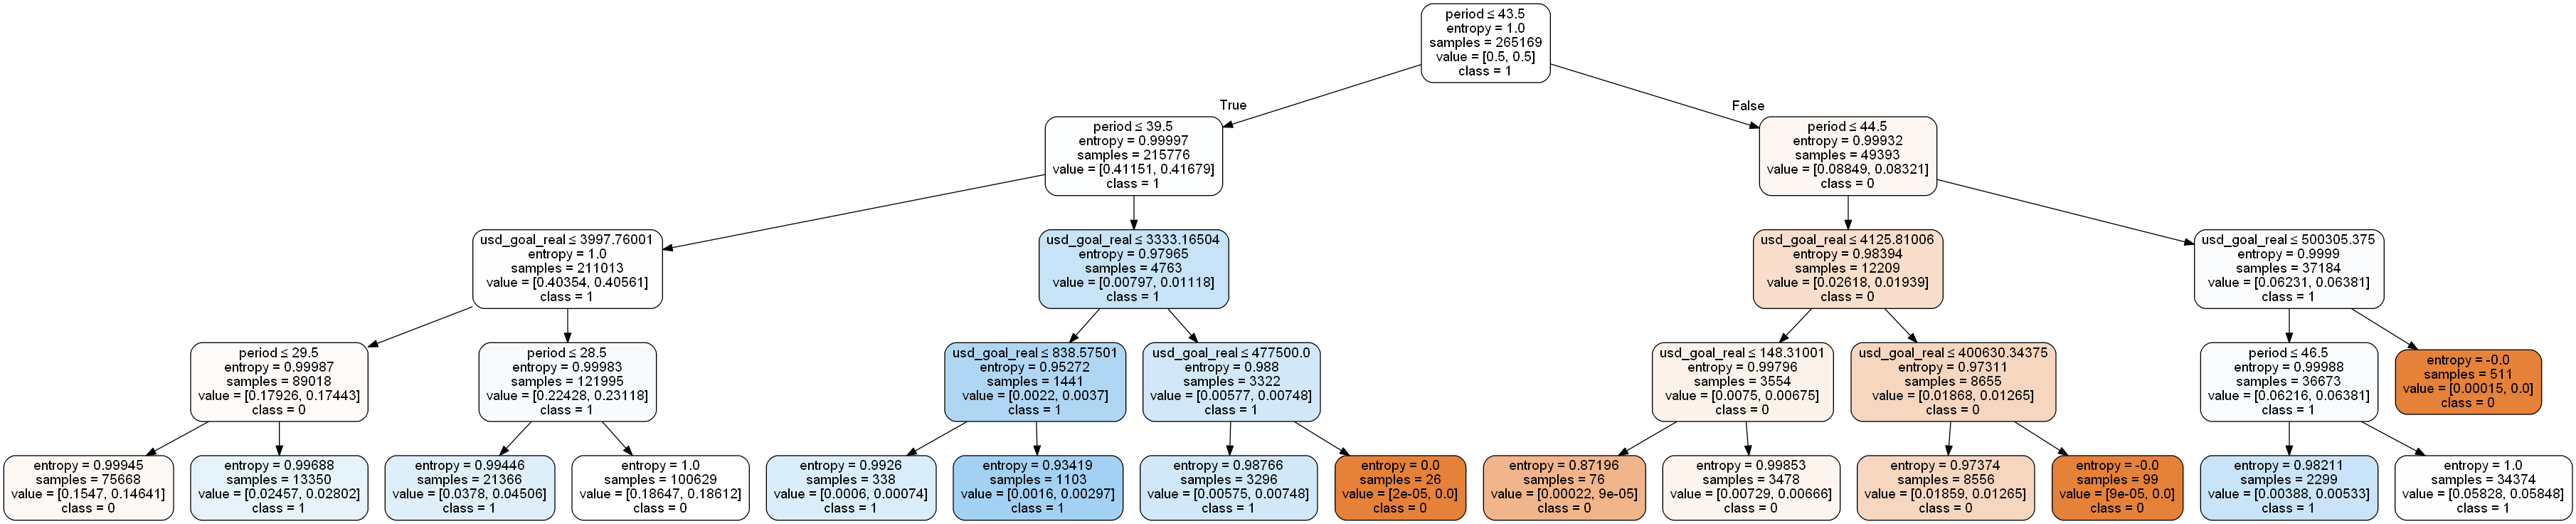

In [38]:
for i, est in enumerate(clf.estimators_):
    print(i)
    
    # 決定木の描画
    dot_data = StringIO() #dotファイル情報の格納先
    export_graphviz(est, out_file=dot_data,
                         feature_names=["usd_goal_real", "main_category_Dance", "period"],  
                         class_names=["0","1", "2"],  
                         filled=True, rounded=True,  
                         special_characters=True,precision=5) 
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
    display(Image(graph.create_png()))

In [39]:
# 学習用データに対する予測を実行
y_pred_train = clf.predict(X_train)

# 対数尤度を表示
print('対数尤度 [Train] = {:.3f}'.format(- log_loss(y_train, y_pred_train)))

# 正答率を表示
print('正答率 [Train] = {:.3f}%'.format(100 * accuracy_score(y_train, y_pred_train)))

対数尤度 [Train] = -12.431
正答率 [Train] = 64.010%


In [40]:
# テスト用データに対する予測を実行
y_pred_test = clf.predict(X_test)

# 対数尤度を表示
print('対数尤度 [Test] = {:.3f}'.format(- log_loss(y_test, y_pred_test)))

# 正答率を表示
print('正答率 [Test] = {:.3f}%'.format(100 * accuracy_score(y_test, y_pred_test)))

対数尤度 [Test] = -12.440
正答率 [Test] = 63.984%


## ニューラルネットワークの使用

In [41]:
# 全データのうち、何%をテストデータにするか（20%に設定）
test_size = 0.2    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234) # テストデータはランダム選択

model = Sequential()
model.add(Dense(3, activation='relu'))
model.add(Dense(3, activation='softmax'))
sgd = SGD(lr=0.05, momentum=0.9, nesterov=False)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 265169 samples, validate on 66293 samples
Epoch 1/4
265169/265169 [==============================] - 0s 1us/sample - loss: 589813.0135 - acc: 0.1853 - val_loss: 1.3156 - val_acc: 0.0000e+00
Epoch 2/4
265169/265169 [==============================] - 0s 1us/sample - loss: 1.3348 - acc: 0.1813 - val_loss: 1.3156 - val_acc: 1.0000
Epoch 3/4
265169/265169 [==============================] - 0s 1us/sample - loss: 1.3348 - acc: 0.3398 - val_loss: 1.3156 - val_acc: 0.0000e+00
Epoch 4/4
265169/265169 [==============================] - 0s 1us/sample - loss: 1.3348 - acc: 0.2277 - val_loss: 1.3156 - val_acc: 1.0000


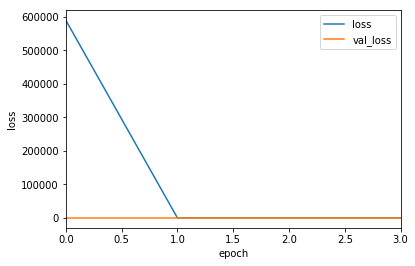

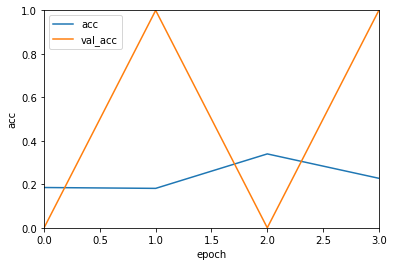

In [42]:
# 計算の実行
nfit = model.fit(X_train, y_train, batch_size=4096, epochs=4, validation_data=(X_test, y_test))

# 各epochにおける損失と精度をdfに入れる
df = pd.DataFrame(nfit.history)


# グラフ化
df[["loss", "val_loss"]].plot()
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

df[["acc", "val_acc"]].plot()
plt.ylabel("acc")
plt.xlabel("epoch")
plt.ylim([0,1.0])
plt.show()

パラメータ指定が悪かったのか、正しいAccuracyが算出できそうにないので、今回はここで断念する。

# まとめ

### 各モデルのAccuracy結果

| 順位   |     モデル      | Accuracy(学習) | Accuracy(テスト) |
| :--- | :----------- | :------- | :------- |
| 1    | アダブースト | 64.010% | 63.984% |
| 2    | ランダムフォレスト | 62.310% | 62.624% |
| 3    | ロジスティック回帰 | 53.002% | 52.695% |
| 4    | ニューラルネットワーク | ― | ― |

最もAccuracyの高いモデルは、アダブーストであった。また、学習とテストの差も小さい。

### 通し課題の感想

1. 今回の講座で初めて機械学習やPythonに触れたため、通し課題でいろんなモデルで試してみることとした。うまく実装できなかったモデルもあるので今後現場で使えるようになるために、リファレンスを参照したり、サンプルコードを探したりしたい。
2. 今回説明変数としてピックアップしたもので精度が高くなったモデルは、アダブーストであった。
3. 今回は説明変数を初期の段階でかなり絞ったが、現場では説明変数はもっと多いはずなので、数が増えても適切に説明変数を抽出できるようにしたい。
4. 課題を進めていく中で前処理が大事だと本当に感じたので、もっと的確にできるようにしていきたい。